In [39]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd 
import scipy
import matplotlib
import matplotlib.pyplot as plt
import nltk
import math
import time
import re 
import os 
import seaborn as sns
import plotly
import plotly.figure_factory as ff
import requests

from PIL import Image
from matplotlib.pyplot import imshow
from io import BytesIO
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import gridspec
from scipy.sparse import hstack
from plotly.graph_objs import Layout, Scatter
plotly.offline.init_notebook_mode(connected = True)

In [2]:
data = pd.read_json("../tops_fashion.json")
print("Number of Data-points in the given dataset is : ", data.shape[0])
print("Number of Features in the given dataset is :", data.shape[1])

Number of Data-points in the given dataset is :  183138
Number of Features in the given dataset is : 19


In [3]:
data.columns

Index(['asin', 'author', 'availability', 'availability_type', 'brand', 'color',
       'editorial_reivew', 'editorial_review', 'formatted_price',
       'large_image_url', 'manufacturer', 'medium_image_url', 'model',
       'product_type_name', 'publisher', 'reviews', 'sku', 'small_image_url',
       'title'],
      dtype='object')

In [4]:
data = data[['asin', 'brand', 'color', 'medium_image_url', 'product_type_name', 'title', 'formatted_price']]

In [5]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [6]:
data["product_type_name"].describe()

count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object

In [7]:
data["product_type_name"].unique()

array(['SHIRT', 'SWEATER', 'APPAREL', 'OUTDOOR_RECREATION_PRODUCT',
       'BOOKS_1973_AND_LATER', 'PANTS', 'HAT', 'SPORTING_GOODS', 'DRESS',
       'UNDERWEAR', 'SKIRT', 'OUTERWEAR', 'BRA', 'ACCESSORY',
       'ART_SUPPLIES', 'SLEEPWEAR', 'ORCA_SHIRT', 'HANDBAG',
       'PET_SUPPLIES', 'SHOES', 'KITCHEN', 'ADULT_COSTUME',
       'HOME_BED_AND_BATH', 'MISC_OTHER', 'BLAZER',
       'HEALTH_PERSONAL_CARE', 'TOYS_AND_GAMES', 'SWIMWEAR',
       'CONSUMER_ELECTRONICS', 'SHORTS', 'HOME', 'AUTO_PART',
       'OFFICE_PRODUCTS', 'ETHNIC_WEAR', 'BEAUTY',
       'INSTRUMENT_PARTS_AND_ACCESSORIES', 'POWERSPORTS_PROTECTIVE_GEAR',
       'SHIRTS', 'ABIS_APPAREL', 'AUTO_ACCESSORY', 'NONAPPARELMISC',
       'TOOLS', 'BABY_PRODUCT', 'SOCKSHOSIERY',
       'POWERSPORTS_RIDING_SHIRT', 'EYEWEAR', 'SUIT', 'OUTDOOR_LIVING',
       'POWERSPORTS_RIDING_JACKET', 'HARDWARE', 'SAFETY_SUPPLY',
       'ABIS_DVD', 'VIDEO_DVD', 'GOLF_CLUB', 'MUSIC_POPULAR_VINYL',
       'HOME_FURNITURE_AND_DECOR', 'TABLET_COMPUTER',

In [8]:
product_type_count = Counter(data["product_type_name"])
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [9]:
data["product_type_name"].isnull().sum()

0

In [10]:
data["brand"].describe()

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object

In [11]:
brand_count = Counter(data["brand"])
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [12]:
data["brand"].isnull().sum()

151

In [13]:
data["color"].describe()

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object

In [14]:
color_count = Counter(data["color"])
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [15]:
data["color"].isnull().sum()

118182

In [16]:
data["formatted_price"].describe()

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object

In [17]:
price_count = Counter(data["formatted_price"])
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [18]:
data["formatted_price"].isnull().sum()

154743

In [19]:
data["title"].describe()

count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object

In [20]:
data["title"].isnull().sum()

0

In [21]:
data["asin"].isnull().sum()

0

In [22]:
data["medium_image_url"].isnull().sum()

0

In [23]:
data.fillna('Unknown', inplace = True)

In [24]:
data.isnull().any()

asin                 False
brand                False
color                False
medium_image_url     False
product_type_name    False
title                False
formatted_price      False
dtype: bool

In [19]:
data.to_pickle("../180k_apparel_data")

In [26]:
import multiprocessing.dummy as mp 

def download_img(num):
    
    url = data.iloc[num]['medium_image_url']
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.save('../image'+ data.iloc[num]['asin'] +'.jpeg')  

if __name__ == "__main__":
    
    p = mp.Pool(8)
    p.map(download_img, range(0, 183138))
    p.close()
    p.join()

In [28]:
data.duplicated('title').sum()

7153

In [30]:
data[data.duplicated('title')].head(10)

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
244,B003BTPVHE,FeatherLite,Pacific Blue,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies Long Sleeve Stain Resistant...,$22.91
261,B01M1K2AOX,fashion t shirts,Black,https://images-na.ssl-images-amazon.com/images...,BOOKS_1973_AND_LATER,Annehoney Donald Trump poster fashion Women's ...,$22.89
348,B001LOT186,Fitness Etc.,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
371,B074KGP484,Fashion Story,Black,https://images-na.ssl-images-amazon.com/images...,SWEATER,Fashion Story Women's Casual Oversized Long Ba...,$8.99
442,B074K6MY5V,Fashion Story,Green,https://images-na.ssl-images-amazon.com/images...,SWEATER,Fashion Story Women's Casual Oversized Long Ba...,$8.99
449,B003BTPVEM,FeatherLite,Pacific Blue,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies Long Sleeve Stain Resistant...,$22.78
465,B06XHYVRK9,Fashion2ne1,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Bling Happy Easter Neon Rhinestones & Studs Eg...,Unknown
510,B01G9CLYVQ,FASCIINO,Red,https://images-na.ssl-images-amazon.com/images...,SHIRT,FASCIINO® Beauty and Beast Red Family Matching...,Unknown
605,B071W7B6DQ,Fever,Unknown,https://images-na.ssl-images-amazon.com/images...,APPAREL,Fever Ladies’ Roll Tab Blouse,Unknown
637,B0728P1LBP,findersKEEPERS,Unknown,https://images-na.ssl-images-amazon.com/images...,SHIRT,findersKEEPERS Women's Curtis Top,Unknown


In [36]:
dup_indx = data[data.duplicated('title')].index

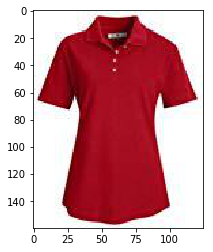

In [41]:
img1 = Image.open('../image/imageB00AQ4GMCK.jpeg', 'r')
img2 = Image.open('../image/imageB00AQ4GMTS.jpeg', 'r')
img3 = Image.open('../image/imageB00AQ4GMLQ.jpeg', 'r')
img4 = Image.open('../image/imageB00AQ4GN3I.jpeg', 'r')
imshow(np.asarray(img1))

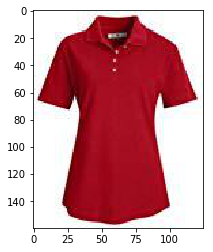

In [42]:
imshow(np.asarray(img2))

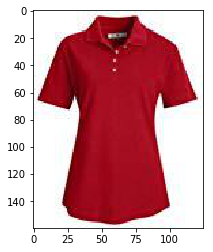

In [43]:
imshow(np.asarray(img3))

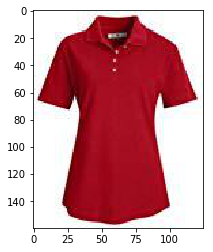

In [44]:
imshow(np.asarray(img4))

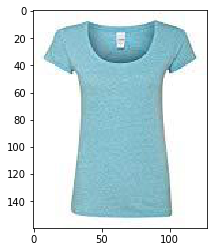

In [45]:
img1 = Image.open('../image/imageB00G278GZ6.jpeg', 'r')
img2 = Image.open('../image/imageB00G278W6O.jpeg', 'r')
img3 = Image.open('../image/imageB00G278Z2A.jpeg', 'r')
img4 = Image.open('../image/imageB00G2786X8.jpeg', 'r')
imshow(np.asarray(img1))

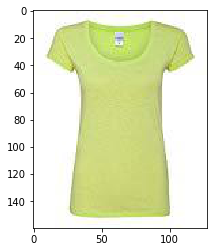

In [46]:
imshow(np.asarray(img2))

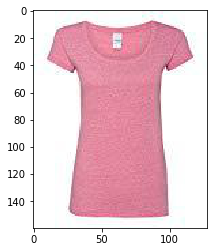

In [47]:
imshow(np.asarray(img3))

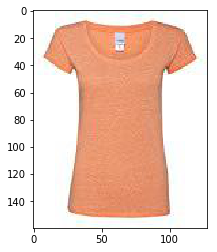

In [48]:
imshow(np.asarray(img4))

In [49]:
data.drop([78412], axis = 0, inplace = True)

In [ ]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

In [51]:
# Sort the whole data based on title (alphabetical order of title) 
data.sort_values('title', inplace = True, ascending = False)
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
27547,B073W7P8KK,Nation LTD,Blue,https://images-na.ssl-images-amazon.com/images...,DRESS,❀Nation Women Stripe Blouse Long Sleeve Shirt ...,Unknown
31277,B01M0PWMZ8,Anglin,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...,Unknown
30453,B01M02GWRG,Anglin,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Striped Floral Long Sleeve Roun...,Unknown
32485,B01N0ADXM0,Anglin,Red,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Fashion Stripe Dress Round Coll...,Unknown
26767,B01MTQAU86,Anglin,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,✽ANGLIN✽ Women Autumn Winter Christmas Printin...,Unknown


In [53]:
indices = []
for i,row in data.iterrows():
    indices.append(i)

In [54]:
import itertools

stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points - 1: 
                stage1_dedupe_asins.append(data['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [56]:
len(stage1_dedupe_asins)

154706

In [57]:
data.shape

(183137, 7)

In [59]:
data = data[data['asin'].isin(stage1_dedupe_asins)]

In [60]:
data.shape

(154706, 7)

In [61]:
data.to_pickle('../154k_apperal_data')

In [ ]:
indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)